First, make sure you can load, read and show an image from the dataset.

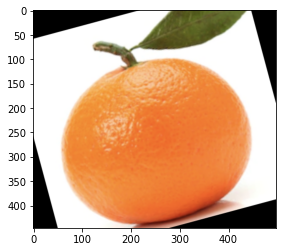

In [1]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

# Import image
image = cv.imread("./dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.50.14 PM.png")

# Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this fruit, let's remove the background using GrabCut algorithm.

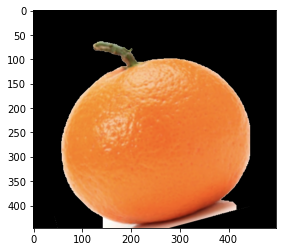

In [2]:
%matplotlib inline
import numpy as np

def grab(image):
    # Create a rectangle with some margin
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    # Execute grab cut algorithm
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, make sure you can load train, test images from the dataset :

In [3]:
import random
from os import walk

def load_images(datasetpath):
    filenames = next(walk(datasetpath), (None, None, []))[2]
    # 💡 Comment the line above if you want to load the whole dataset
    filenames = random.sample(filenames, 100)
    return [grab(cv.imread('./{}/{}'.format(datasetpath, filename))) for filename in filenames]

# Load apples
print("Loading apples...")
test_fresh_apples = load_images("./dataset/test/freshapples")
test_rotten_apples = load_images("./dataset/test/rottenapples")
train_fresh_apples = load_images("./dataset/train/freshapples")
train_rotten_apples = load_images("./dataset/train/rottenapples")
print("Apples loaded!")

# Load oranges
print("Loading oranges...")
test_fresh_oranges = load_images("./dataset/test/freshoranges")
test_rotten_oranges = load_images("./dataset/test/rottenoranges")
train_fresh_oranges = load_images("./dataset/train/freshoranges")
train_rotten_oranges = load_images("./dataset/train/rottenoranges")
print("Oranges loaded!")

# Load bananas
print("Loading bananas...")
test_fresh_bananas = load_images("./dataset/test/freshbanana")
test_rotten_bananas = load_images("./dataset/test/rottenbanana")
train_fresh_bananas = load_images("./dataset/train/freshbanana")
train_rotten_bananas = load_images("./dataset/train/rottenbanana")
print("Bananas loaded!")

Loading apples...
Apples loaded!
Loading oranges...
Oranges loaded!
Loading bananas...
Bananas loaded!


Now, let's compare fresh fruit dominant colors with rotten fruit dominant colors (from KMeans clustering).

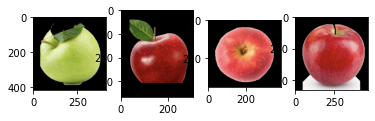

[ 69.31649003 168.32708798 148.60622083] 48.05%
[131.09362575 218.34423907 205.77146604] 51.95%
[132.96531933 143.6823788  202.31786543] 16.48%
[ 28.785118    45.34902687 132.66218394] 83.52%
[134.27418459 148.81302099 237.27405634] 33.90%
[ 75.94012736  84.95923146 214.45022649] 66.10%
[195.98093327 197.09305904 224.26472654] 20.92%
[ 70.22017482  70.35861734 184.32307081] 79.08%


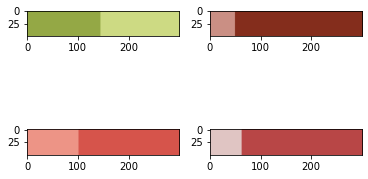

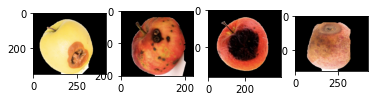

[ 64.75483439 129.07514219 211.14700569] 20.40%
[136.08187305 225.37565584 248.86493947] 79.60%
[ 39.01614565  63.02009619 151.21109584] 46.00%
[ 86.33536541 130.89798017 226.93889093] 54.00%
[16.16454517 18.92207389 60.60346166] 25.36%
[ 68.66474293  96.04703929 221.91835982] 74.64%
[146.58472998 175.37810884 236.3647424 ] 39.39%
[ 76.02118644 111.64881463 184.87655546] 60.61%


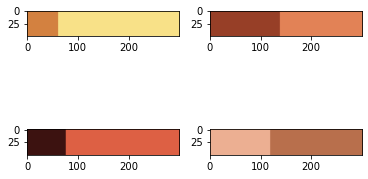

In [21]:
import cv2, numpy as np
from sklearn.cluster import KMeans

# ~ thank you nathancy (https://stackoverflow.com/a/58177484)
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Retreive image color clusters
def retreive_cluster(image):
    # Flatten the image
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    # Filter out background black pixels
    reshape = [c for c in reshape if np.mean(c) > 10]
    # Find and display most dominant colors
    try:
        return KMeans(n_clusters=2,max_iter=30).fit(reshape)
    except:
        return None


# Visualize image dominant colors
def visualize_img_colors(image):
    cluster = retreive_cluster(image)
    if(cluster == None):
        return
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    plt.imshow(visualize)


### FRESH FRUITS

# Import random fresh fruit image samples
fresh = random.sample(train_fresh_apples, 4)

# Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

# Show dominant colors
plt.subplot(221)
visualize_img_colors(fresh[0])
plt.subplot(222)
visualize_img_colors(fresh[1])
plt.subplot(223)
visualize_img_colors(fresh[2])
plt.subplot(224)
visualize_img_colors(fresh[3])
plt.show()

### ROTTEN FRUITS

# Import random rotten fruit image samples
rotten = random.sample(train_rotten_apples, 4)

# Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

# Show dominant colors
plt.subplot(221)
visualize_img_colors(rotten[0])
plt.subplot(222)
visualize_img_colors(rotten[1])
plt.subplot(223)
visualize_img_colors(rotten[2])
plt.subplot(224)
visualize_img_colors(rotten[3])
plt.show()

In [23]:
# Manually chosen dominant colors associated with fresh fruits
apple_fersh_models = [
    [75.15700388, 75.12360908, 203.13857697],
    [200.17110849, 196.79142099, 243.18826651],
    [127.73719256, 218.72575507, 212.09500446],
    [58.30685044, 166.73907485, 154.24399724],
    [45.09837263,  38.18722606, 105.9384005],
    [162.96305302, 162.41885875, 199.00461048],
    [70.38219073, 196.78242014, 152.3037193],
    [178.7115755, 208.49210324, 196.06278891]
]
orange_fersh_models = [
    [52.62208916, 114.64789262, 191.99140849],
    [66.14225837, 156.23681529, 235.72209725],
    [154.04304245, 205.27174233, 245.21182193],
    [58.95040263, 139.46691227, 238.31044096],
    [100.22536713, 185.77643777, 242.83468701],
    [60.22376481, 152.86220761, 232.49610936],
]
banana_fresh_models = [
    [53.4520577, 120.88162919, 161.43551124],
    [119.15711061, 204.31948834, 237.81143717],
    [218.65526906, 235.32390479, 240.13858227],
    [92.64593909, 203.63519194, 228.1096526 ],
    [54.04890388, 78.38026981, 118.68802698],
    [105.28331639, 228.14989135, 251.48555708],
    [93.06612644, 208.0211198, 244.59547675],
    [254.39203187, 254.76028386, 254.87976843],
]

# Manually chosen dominant colors associated with rotten fruits
apple_rotten_models = [
    [100.55315447, 145.91623164, 204.73157703],
    [43.36641358, 67.97659669, 118.0219741],
    [89.49765777, 108.36709496, 139.99993308],
    [54.71434124, 61.81299745, 87.72864917],
    [68.42416452, 93.10177243, 174.06359085],
    [95.03433135, 121.11923829, 216.67946034],
    [87.29873011, 99.65116279, 162.67005814],
    [219.00075358, 219.17950264, 234.93850791]
]
orange_rotten_models = [
    [109.5730499, 121.9958566, 118.94338858],
    [176.63736994, 194.73121032, 208.27683409],
    [118.64531228, 159.21845076, 182.77708304],
    [187.26338168, 214.30514761, 230.66219354],
    [58.06415674, 90.81664014, 200.51764448],
    [155.15345627, 169.02749919, 207.80108918],
    [68.27130682, 110.67613636, 170.58948864],
    [25.20906983, 26.60286873, 40.26716894],
    [106.92118046, 119.86577766, 117.860966],
    [177.10820732, 191.77796114, 200.74842555],
]
banana_rotten_models = [
    [191.98762215, 191.76160695, 202.81368078],
    [46.69543056, 41.64402886, 62.15377436],
    [197.77850286, 219.84329741, 228.54959582],
    [71.42087445, 100.49090587, 124.94844448],
    [140.59689843, 144.0887337, 156.82017048],
    [72.30038638, 72.46163753, 82.36629255],
    [68.27130682, 110.67613636, 170.58948864],
    [25.20906983, 26.60286873, 40.26716894],
]

# Determine the fruit quality based on its dominant colors
def cluster_score(image, fersh_models, rotten_models):
    # Retreive the image color clusters
    cluster = retreive_cluster(image)
    if(cluster == None):
        return 0 # no cluster, so we don't know :(
    # Determine how far it from our models
    fresh = np.min([np.linalg.norm(center-model) for model in fersh_models for center in cluster.cluster_centers_])
    rotten = np.min([np.linalg.norm(center-model) for model in rotten_models for center in cluster.cluster_centers_])
    # Deduce its quality (-1: fresh; 1: rotten)
    return (fresh - rotten) / (fresh + rotten + .1)

Notice : rotten fruit often has a crumpled skin (hence a contrasted skin), so we can also use this criterion to determine if the fruit is rotten or not.

fresh image1 average 0.3454252369191319
fresh image2 average 0.3750632543802067
fresh image3 average 0.3492708107511136
fresh image4 average 0.34439400341679893


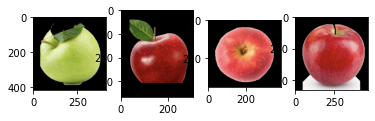

rotten image1 average 0.2649720360922559
rotten image2 average 0.5146113736753263
rotten image3 average 0.4654915565019371
rotten image4 average 0.4830784663657253


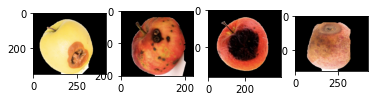

In [24]:
threshold = 1

# Apply a Laplacian filter
def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

def laplace_score(image):
    arr = np.asarray(abs_dst(image)).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    if(len(newarr) == 0):
        return 0
    return newarr.mean() / 255

### FRESH FRUITS

print("fresh image1 average", laplace_score(fresh[0]))
print("fresh image2 average", laplace_score(fresh[1]))
print("fresh image3 average", laplace_score(fresh[2]))
print("fresh image4 average", laplace_score(fresh[3]))

# Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN FRUITS

print("rotten image1 average", laplace_score(rotten[0]))
print("rotten image2 average", laplace_score(rotten[1]))
print("rotten image3 average", laplace_score(rotten[2]))
print("rotten image4 average", laplace_score(rotten[3]))

# Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

Now, let's plot our feature vector over the whole train dataset !

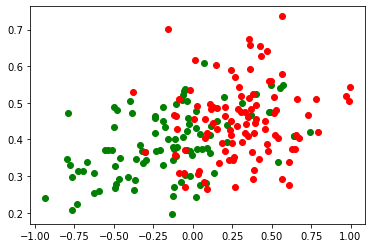

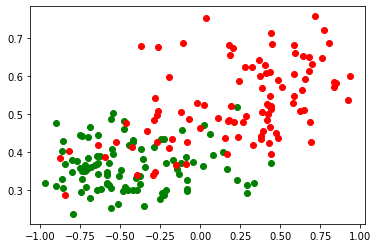

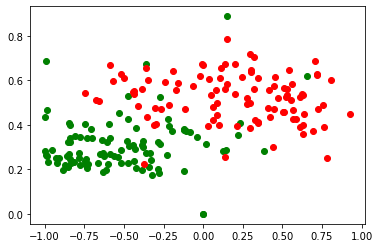

In [25]:
### APPLES

apple_fresh_vectors = np.asarray([[cluster_score(fresh, apple_fersh_models, apple_rotten_models), laplace_score(fresh)] for fresh in train_fresh_apples]).T
apple_rotten_vectors = np.asarray([[cluster_score(rotten, apple_fersh_models, apple_rotten_models), laplace_score(rotten)] for rotten in train_rotten_apples]).T

# Scatter fresh vectors
xf, yf = apple_fresh_vectors
plt.scatter(xf,yf,color="green")

# Scatter rotten vectors
xr, yr = apple_rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()

### ORANGES

orange_fresh_vectors = np.asarray([[cluster_score(fresh, orange_fersh_models, orange_rotten_models), laplace_score(fresh)] for fresh in train_fresh_oranges]).T
orange_rotten_vectors = np.asarray([[cluster_score(rotten, orange_fersh_models, orange_rotten_models), laplace_score(rotten)] for rotten in train_rotten_oranges]).T

# Scatter fresh vectors
xf, yf = orange_fresh_vectors
plt.scatter(xf,yf,color="green")

# Scatter rotten vectors
xr, yr = orange_rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()

### BANANAS

banana_fresh_vectors = np.asarray([[cluster_score(fresh, banana_fresh_models, banana_rotten_models), laplace_score(fresh)] for fresh in train_fresh_bananas]).T
banana_rotten_vectors = np.asarray([[cluster_score(rotten, banana_fresh_models, banana_rotten_models), laplace_score(rotten)] for rotten in train_rotten_bananas]).T

# Scatter fresh vectors
xf, yf = banana_fresh_vectors
plt.scatter(xf,yf,color="green")

# Scatter rotten vectors
xr, yr = banana_rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()


Deduce the accuracy (Binary Classification, Logistic Regression) :

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

def accuracy(fresh_vectors, rotten_vectors):
    # Create the binary classifier
    (_, lf) = np.shape(fresh_vectors)
    (_, lr) = np.shape(rotten_vectors)
    X = np.concatenate((fresh_vectors, rotten_vectors), axis=1)
    y = np.concatenate((np.full((lf), 0), np.full((lr), 1)))
    X, y = shuffle(X.T, y, random_state=0)

    clf = LogisticRegression(random_state=0).fit(X, y)

    # Load the test vectors
    test_fresh_vectors = fresh_vectors
    test_rotten_vectors = rotten_vectors

    # Calculate the accuracy
    (_, ltf) = np.shape(test_fresh_vectors)
    (_, ltr) = np.shape(test_rotten_vectors)
    tX = np.concatenate((test_fresh_vectors.T, test_rotten_vectors.T), axis=0)
    ty = np.concatenate((np.full((ltf), 0), np.full((ltr), 1)))

    return 1-np.mean(np.abs(clf.predict(tX)-ty))

print('Apples accuracy : {:0.2f}%'.format(100 * accuracy(apple_fresh_vectors, apple_rotten_vectors)))
print('Oranges accuracy : {:0.2f}%'.format(100 * accuracy(orange_fresh_vectors, orange_rotten_vectors)))
print('Bananas accuracy : {:0.2f}%'.format(100 * accuracy(banana_fresh_vectors, banana_rotten_vectors)))

Apples accuracy : 79.00%
Oranges accuracy : 82.00%
Bananas accuracy : 83.50%
